# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [79]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Change current working directory to project folder (1 mark)

In [0]:
import os
#os.chdir() -- Since working on Google Colab not changing the directory.

### Load the "images.npy" file (4 marks)
- This file contains images with details of bounding boxes

In [0]:
#input.size

In [0]:
import numpy as np
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
data = np.load('/content/gdrive/My Drive/images.npy')
np.load = np_load_old

### Check one sample from the loaded "images.npy" file  (4 marks)

In [83]:
#Checking image boundaries
data[11][1]

[{'imageHeight': 960,
  'imageWidth': 648,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.046296296296296294, 'y': 0.16354166666666667},
   {'x': 0.2037037037037037, 'y': 0.2989583333333333}]},
 {'imageHeight': 960,
  'imageWidth': 648,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.3194444444444444, 'y': 0.1375},
   {'x': 0.5570987654320988, 'y': 0.29583333333333334}]},
 {'imageHeight': 960,
  'imageWidth': 648,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.5648148148148148, 'y': 0.1875},
   {'x': 0.7145061728395061, 'y': 0.30520833333333336}]},
 {'imageHeight': 960,
  'imageWidth': 648,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7160493827160493, 'y': 0.209375},
   {'x': 0.8333333333333334, 'y': 0.30625}]},
 {'imageHeight': 960,
  'imageWidth': 648,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.8225308641975309, 'y': 0.23125},
   {'x': 0.9429012345679012, 'y': 0.3177083333333333}]}]

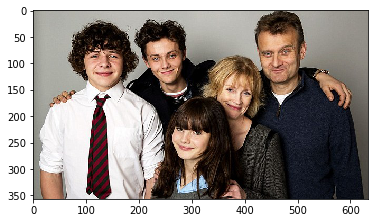

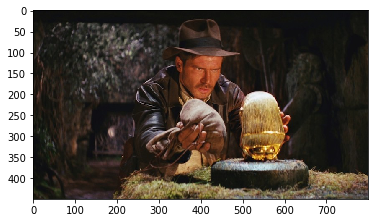

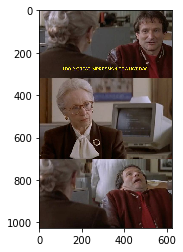

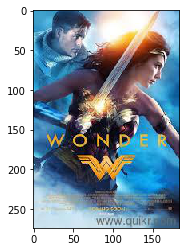

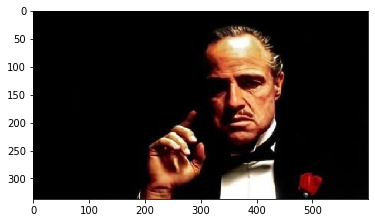

In [84]:
#display a set of images
from matplotlib import pyplot as plt
for i in range(6,11):
  plt.imshow(data[i][0], cmap='gray')
  plt.show()


### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [87]:
X_train.shape

(409, 224, 224, 3)

In [88]:
masks.shape

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

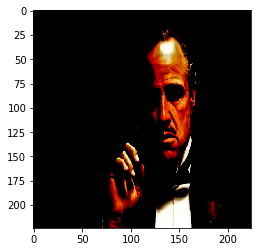

In [89]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

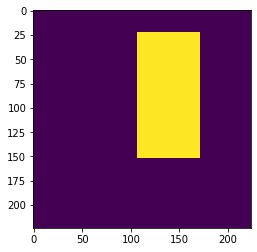

In [90]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
#Settings
ALPHA = 1
EPOCHS = 100
BATCH_SIZE = 1
PATIENCE = 10
THREADS = 1

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model


def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")
    for layer in model.layers:
        layer.trainable = trainable

    block1 = model.input
    block2 = model.get_layer("conv_pw_1_relu").output
    block3 = model.get_layer("conv_pw_3_relu").output
    block4 = model.get_layer("conv_pw_5_relu").output
    block5 = model.get_layer("conv_pw_11_relu").output
    block6 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block6), block5])
    x = Concatenate()([UpSampling2D()(x), block4])
    x = Concatenate()([UpSampling2D()(x), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function

In [93]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(True)

# Print summary
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
____________________________________________________________________________________________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
import tensorflow as tf
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (5 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [0]:
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [98]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (5 marks)
- Fit the model using below parameters
  - epochs: 100
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [99]:
masks[0].shape

(224, 224)

In [100]:
model.fit(X_train, masks ,epochs=EPOCHS,              
                    callbacks=[checkpoint, reduce_lr, stop],
                    workers=THREADS,
                    use_multiprocessing=False,
                    shuffle=True, batch_size = BATCH_SIZE)

Train on 409 samples
Epoch 1/100
408/409 [============================>.] - ETA: 0s - loss: 1.2706 - dice_coefficient: 0.4601
Epoch 00001: loss improved from inf to 1.27072, saving model to model-1.27.h5
409/409 [==============================] - 36s 89ms/sample - loss: 1.2707 - dice_coefficient: 0.4601
Epoch 2/100
408/409 [============================>.] - ETA: 0s - loss: 0.7796 - dice_coefficient: 0.6204
Epoch 00002: loss improved from 1.27072 to 0.77930, saving model to model-0.78.h5
409/409 [==============================] - 26s 63ms/sample - loss: 0.7793 - dice_coefficient: 0.6204
Epoch 3/100
408/409 [============================>.] - ETA: 0s - loss: 0.6119 - dice_coefficient: 0.6811
Epoch 00003: loss improved from 0.77930 to 0.61260, saving model to model-0.61.h5
409/409 [==============================] - 26s 64ms/sample - loss: 0.6126 - dice_coefficient: 0.6805
Epoch 4/100
408/409 [============================>.] - ETA: 0s - loss: 0.5527 - dice_coefficient: 0.7068
Epoch 00004: l

### Get the predicted mask for a sample image   (5 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


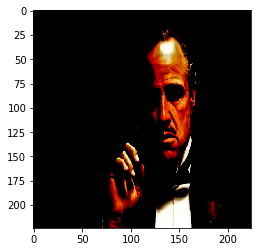

In [101]:
n = 10
sample_image = [X_train[n]]
pyplot.imshow(sample_image[0])
mask = model.predict(x=np.array(sample_image))


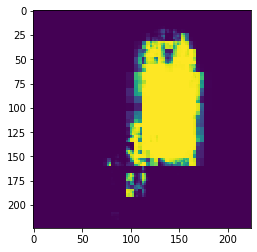

In [102]:
pyplot.imshow(mask[0])

### Impose the mask on the image (5 marks)

In [110]:
print(sample_image[0].shape)
print(mask[0].shape)


(224, 224, 3)
(224, 224)


In [105]:
mask[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
region = mask[0]
unscaled = sample_image[0]
THRESHOLD = 0.8
EPSILON = 0.02
CELL_WIDTH = 1
CELL_HEIGHT = 1

In [0]:
output = np.zeros(unscaled.shape[:2], dtype=np.uint8)
for i in range(region.shape[1]):
    for j in range(region.shape[0]):
        if region[i][j] > THRESHOLD:
            x = int(CELL_WIDTH * j * unscaled.shape[1] / IMAGE_WIDTH)
            y = int(CELL_HEIGHT * i * unscaled.shape[0] / IMAGE_HEIGHT)
            x2 = int(CELL_WIDTH * (j + 1) * unscaled.shape[1] / IMAGE_WIDTH)
            y2 = int(CELL_HEIGHT * (i + 1) * unscaled.shape[0] / IMAGE_HEIGHT)
            output[y:y2,x:x2] = 1

contours= cv2.findContours(output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours[0]:
    approx = cv2.approxPolyDP(cnt, EPSILON * cv2.arcLength(cnt, True), True)
    x, y, w, h = cv2.boundingRect(approx)
    cv2.rectangle(unscaled, (x, y), (x + w, y + h), (0, 255, 0), 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


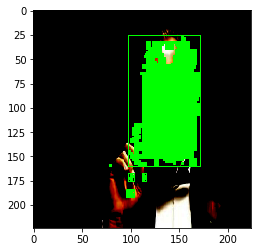

In [114]:
plt.imshow(unscaled)